<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_16_Matplotlib Advanced Customization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Job Postings Trend for Cloud Engineers (2.16.1)

In [4]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()

In [9]:
df_ce['job_posted_month_no'] = df_ce['job_posted_date'].dt.month

In [13]:
df_ce_pivot = df_ce.pivot_table(index='job_posted_month_no', columns='job_title_short', aggfunc='size')

In [14]:
df_ce_pivot

job_title_short,Cloud Engineer
job_posted_month_no,
1,1295
2,843
3,883
4,1051
5,480
6,714
7,1059
8,1378
9,1022


In [15]:
df_ce_pivot = df_ce_pivot.reset_index()
df_ce_pivot['job_posted_month'] = df_ce_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_ce_pivot = df_ce_pivot.set_index('job_posted_month')
df_ce_pivot = df_ce_pivot.drop(columns='job_posted_month_no')
df_ce_pivot

job_title_short,Cloud Engineer
job_posted_month,
Jan,1295
Feb,843
Mar,883
Apr,1051
May,480
Jun,714
Jul,1059
Aug,1378
Sep,1022


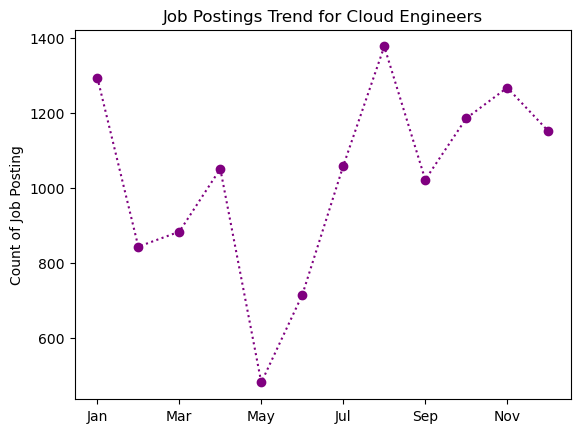

In [20]:
df_ce_pivot.plot(
    kind='line',
    linestyle='dotted',
    color='purple',
    marker='o'
)
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Posting')
plt.xlabel('')
plt.legend().set_visible(False)
plt.show()

### right way to solve this problem

In [ ]:
# This is right way!!!

df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()

---

## 🟨 Customize Bar Chart (2.16.2)

In [5]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

In [13]:
location_counts = SDA_df['company_name'].value_counts().head(5) 

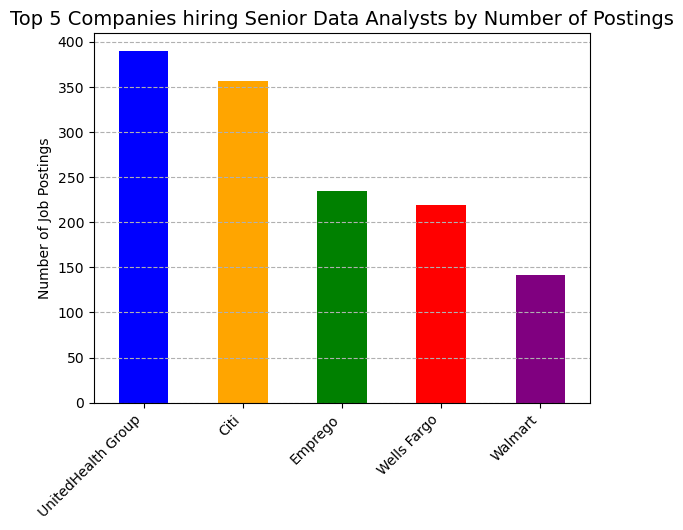

In [19]:
location_counts.plot(
    kind='bar',
    color=colors,    
)

plt.grid(axis='y', linestyle='--')
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# Code Needed
colors = ['blue', 'orange', 'green', 'red', 'purple']

---